# 隨機梯度下降(Stochastic Gradient Decent)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from random import choices
from mpl_toolkits.mplot3d import Axes3D
from tqdm.notebook import tqdm

# Training Data

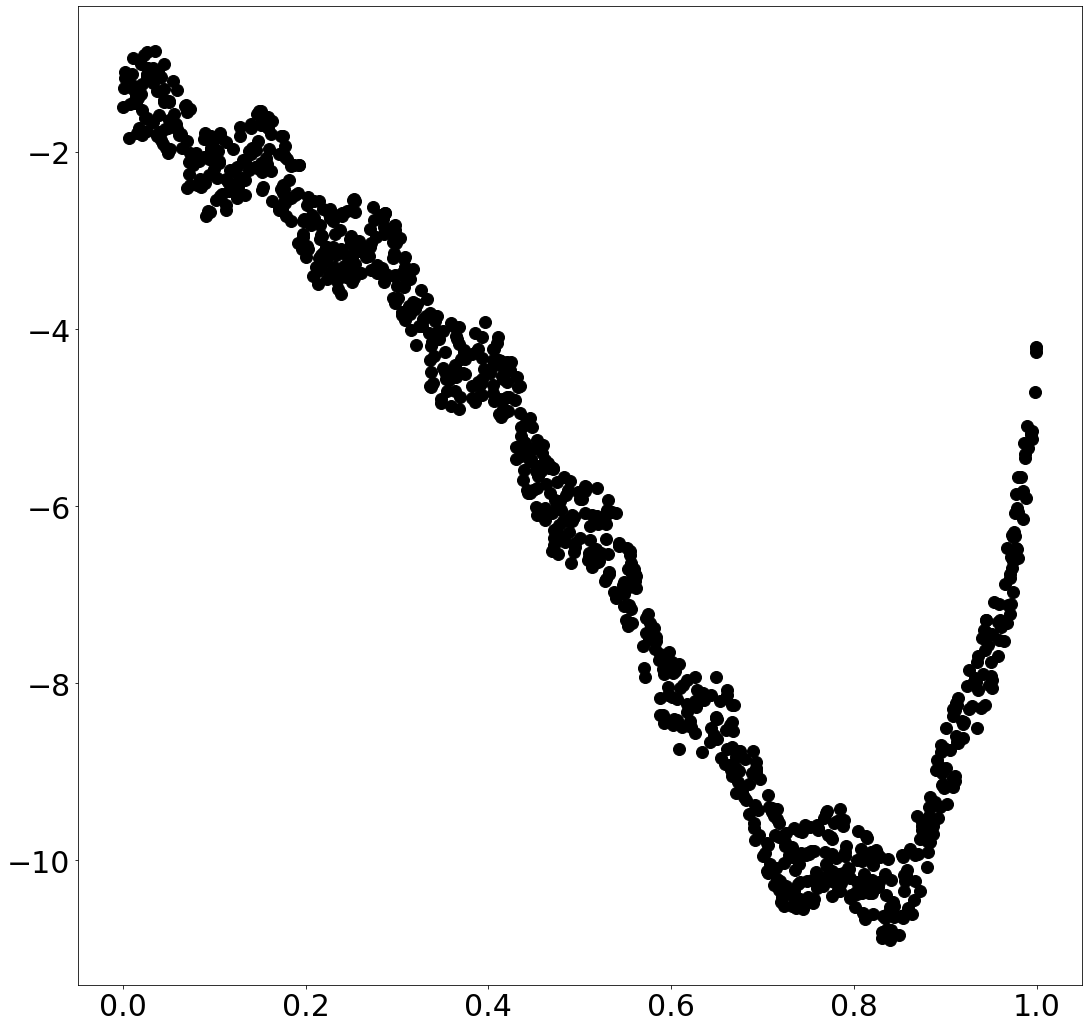

In [2]:
# p0~p9代表0次到9次方
N=1000
p9,p8,p7,p6,p5,p4,p3,p2,p1,p0=1,3,5,7,9,-10,-8,-6,-4,-2
x=np.zeros(N)
y=np.zeros(N)
# 隨機產生數據點
for i in range(0,len(x)):
    x[i]+=random.random()
    y[i]+=random.random()*1
power=[p9,p8,p7,p6,p5,p4,p3,p2,p1,p0]
for i in range(0,len(power)):
    y+=power[len(power)-i-1]*(x**i)+np.sin(50*x)*0.03
# 視覺化
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x,y,"ko",markersize=12)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Gradient Decent

In [3]:
r=0.1
T=100000
c=6
error=np.zeros(T)
comp=np.ones(N).reshape(N,1)
for i in range(1,c):
    comp=np.concatenate((comp,(x**i).reshape(N,1)),axis=1)
w=np.ones(c)
for i in tqdm(range(T)):
    grad=r*np.dot(comp.T,y-np.dot(comp,w))/N
    w+=grad
    error[i]=sum((y-np.dot(comp,w))**2)/N
print(error[T-1])


0.16403860558983183


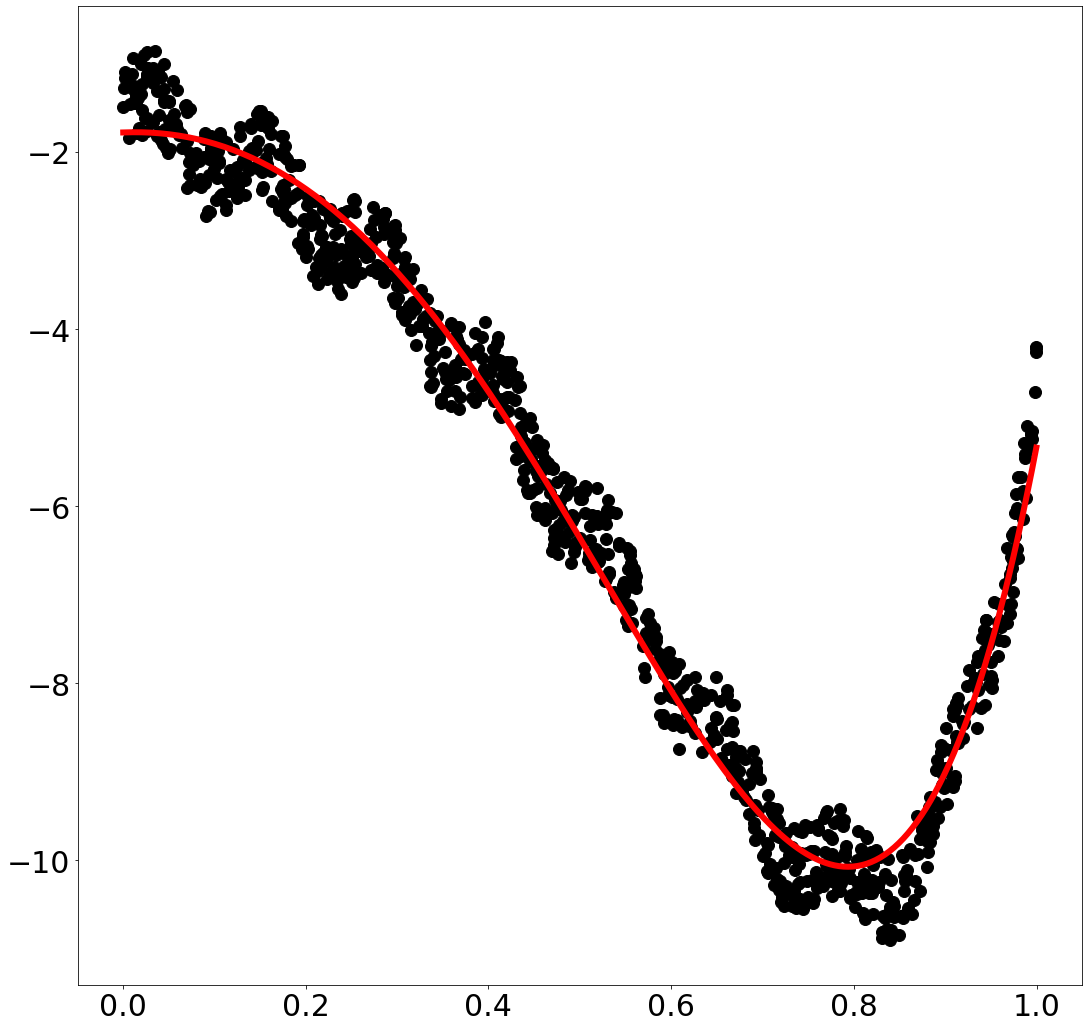

In [4]:
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x,y,"ko",markersize=12)
x_plot=np.linspace(min(x),max(x),200)
comp_plot=np.ones(200).reshape(200,1)
for i in range(1,c):
    comp_plot=np.concatenate((comp_plot,(x_plot**i).reshape(200,1)),axis=1)
plt.plot(x_plot,np.dot(comp_plot,w),"r-",linewidth=6)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Stochastic Gradient Decent

In [5]:
T=100000
c=6
error_SGD=np.zeros(T)
w_SGD=np.ones(c)
for i in tqdm(range(T)):
    seed=choices(range(0,len(x)), k=1)
    grad=(r*(y[seed]-np.dot(comp[seed,:],w_SGD))*comp[seed,:]).flatten()
    w_SGD+=grad
    error_SGD[i]=sum((y-np.dot(comp,w_SGD))**2)/N
print(error_SGD[T-1])


0.17036431104498356


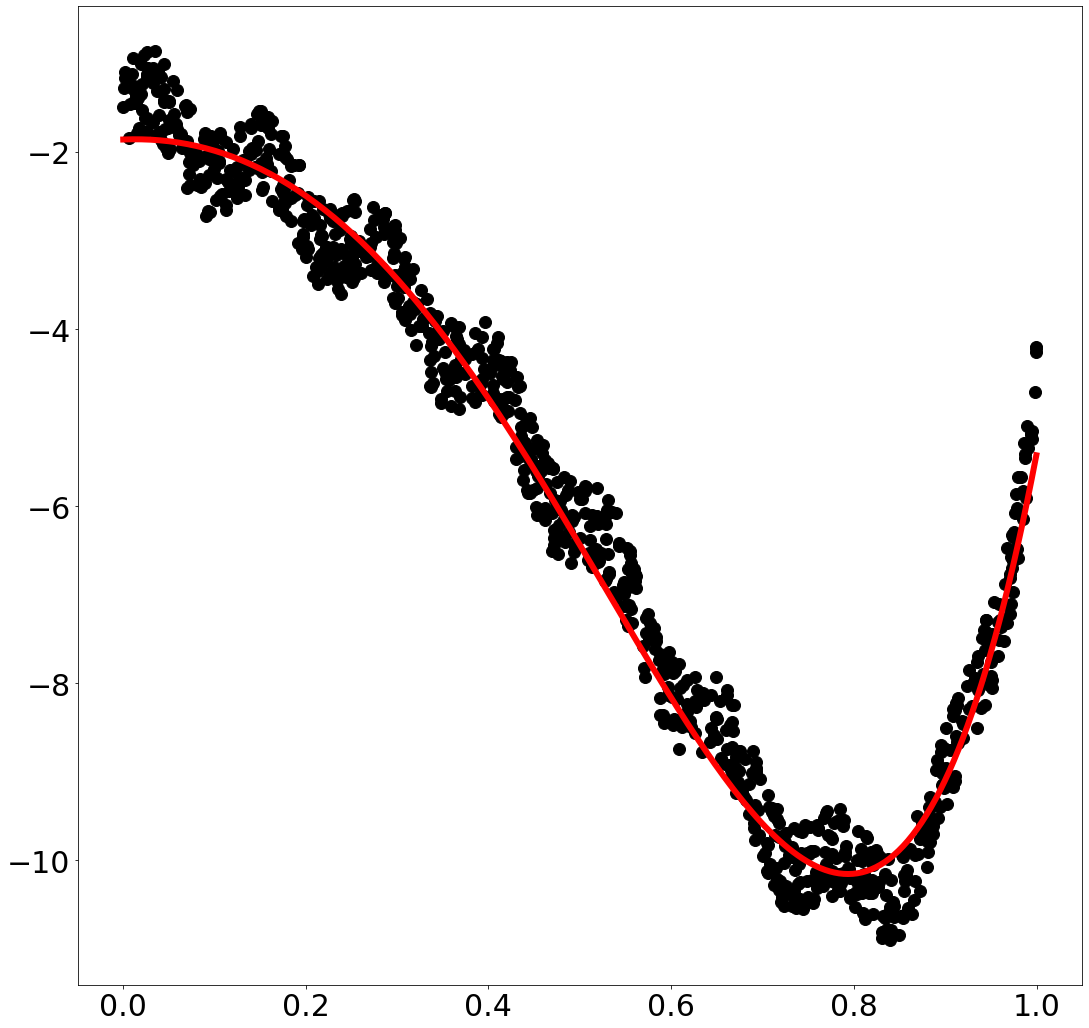

In [6]:
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x,y,"ko",markersize=12)
x_plot=np.linspace(min(x),max(x),200)
comp_plot=np.ones(200).reshape(200,1)
for i in range(1,c):
    comp_plot=np.concatenate((comp_plot,(x_plot**i).reshape(200,1)),axis=1)
plt.plot(x_plot,np.dot(comp_plot,w_SGD),"r-",linewidth=6)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Compare

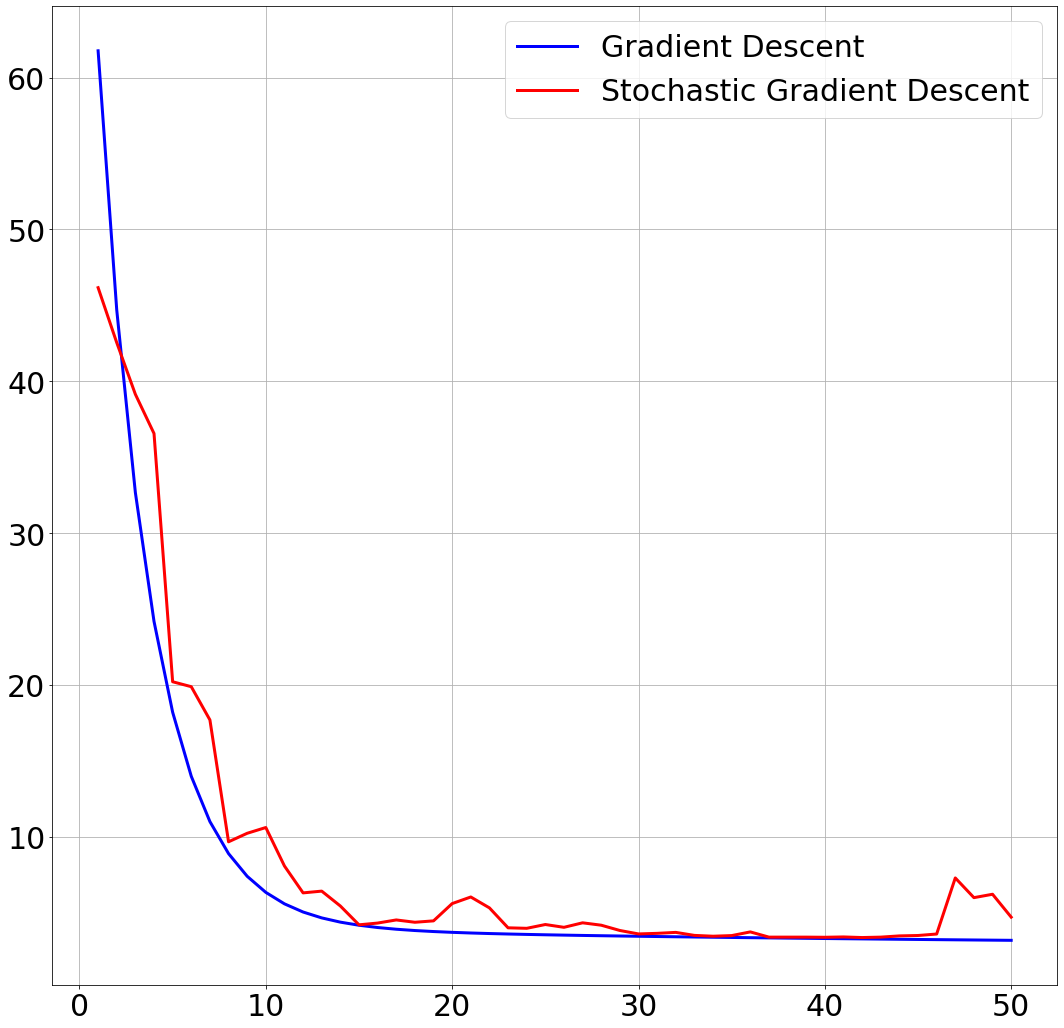

In [8]:
plt.rcParams["figure.figsize"] = (18,18)
f=50
plt.plot(np.linspace(1,T,T)[:f],error[:f],"b-",linewidth=3,label="Gradient Descent")
plt.plot(np.linspace(1,T,T)[:f],error_SGD[:f],"r-",linewidth=3,label="Stochastic Gradient Descent")
plt.legend(fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid()
plt.show()